# Importing the necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import glob
import shutil
import seaborn as sns
import math
import scipy.stats as stats

In [2]:
dflp=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\leftpace_aggr.csv")
dfls=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\leftspin_aggr.csv")
dfrp=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\rightpace_aggr.csv")
dfrs=pd.read_csv(r"C:\ime_project\left-left_right-right\file2_elaborated_bowlers_perspective\rightspin_aggr.csv")

In [3]:
dflp.head()

,inning_number,Bowler,Runs_Conceded,total_deliveries,runs_left,runs_right,delivery_left,delivery_right,wickets_taken,wickets_left,...,bowled,caught,lbw,runout,stumped,economy,economy_left,economy_right,bowler_hand,bowler_type
0,1.0,A Nehra,927.0,1106.0,155.0,745.0,189.0,917.0,37.0,1.0,...,8.0,21.0,6.0,0.0,0.0,5.028933,4.920635,4.874591,left,pace
1,1.0,AJ McKay,211.0,286.0,57.0,145.0,68.0,218.0,11.0,2.0,...,3.0,6.0,1.0,0.0,0.0,4.426573,5.029412,3.990826,left,pace
2,1.0,AK Peters,34.0,49.0,0.0,29.0,0.0,49.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.163265,NaN,3.551020,left,pace
3,1.0,AM Guruge,163.0,143.0,0.0,158.0,0.0,143.0,5.0,0.0,...,0.0,5.0,0.0,0.0,0.0,6.839161,NaN,6.629371,left,pace
4,1.0,APC Kilowan,18.0,54.0,0.0,16.0,0.0,54.0,3.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.000000,NaN,1.777778,left,pace


In [4]:
print(dflp.isna().sum())

inning_number        0
Bowler               0
Runs_Conceded        0
total_deliveries     0
runs_left            0
runs_right           0
delivery_left        0
delivery_right       0
wickets_taken        0
wickets_left         0
wickets_right        0
wide                 0
no_ball              0
leg_byes             0
byes                 0
match_number         0
P1_balls             0
P2_balls             0
P3_balls             0
P1_Runs_Left         0
P2_Runs_Left         0
P3_Runs_Left         0
P1_Runs_Right        0
P2_Runs_Right        0
P3_Runs_Right        0
P1_Runs              0
P2_Runs              0
P3_Runs              0
bowled               0
caught               0
lbw                  0
runout               0
stumped              0
economy              0
economy_left        58
economy_right        2
bowler_hand          0
bowler_type          0
dtype: int64


In [5]:
print(dfls.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        156
economy_right         2
bowler_hand           0
bowler_type           0
dtype: int64


In [6]:
print(dfrp.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        415
economy_right        41
bowler_hand           0
bowler_type           0
dtype: int64


In [7]:
print(dfrs.isna().sum())

inning_number         0
Bowler                0
Runs_Conceded         0
total_deliveries      0
runs_left             0
runs_right            0
delivery_left         0
delivery_right        0
wickets_taken         0
wickets_left          0
wickets_right         0
wide                  0
no_ball               0
leg_byes              0
byes                  0
match_number          0
P1_balls              0
P2_balls              0
P3_balls              0
P1_Runs_Left          0
P2_Runs_Left          0
P3_Runs_Left          0
P1_Runs_Right         0
P2_Runs_Right         0
P3_Runs_Right         0
P1_Runs               0
P2_Runs               0
P3_Runs               0
bowled                0
caught                0
lbw                   0
runout                0
stumped               0
economy               0
economy_left        257
economy_right        34
bowler_hand           0
bowler_type           0
dtype: int64


In [8]:
for i in range(dflp.shape[0]):
    if(pd.isnull(dflp.iloc[i,34])):
        dflp['economy_left'][i]=dflp['economy'][i]
    if(pd.isnull(dflp.iloc[i,35])):
        dflp['economy_right'][i]=dflp['economy'][i]
        
for i in range(dfls.shape[0]):
    if(pd.isnull(dfls.iloc[i,34])):
        dfls['economy_left'][i]=dfls['economy'][i]
    if(pd.isnull(dfls.iloc[i,35])):
        dfls['economy_right'][i]=dfls['economy'][i]
        
for i in range(dfrp.shape[0]):
    if(pd.isnull(dfrp.iloc[i,34])):
        dfrp['economy_left'][i]=dfrp['economy'][i]
    if(pd.isnull(dfrp.iloc[i,35])):
        dfrp['economy_right'][i]=dfrp['economy'][i]
        
for i in range(dfrs.shape[0]):
    if(pd.isnull(dfrs.iloc[i,34])):
        dfrs['economy_left'][i]=dfrs['economy'][i]
    if(pd.isnull(dfrs.iloc[i,35])):
        dfrs['economy_right'][i]=dfrs['economy'][i]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7456\1848378165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflp['economy_left'][i]=dflp['economy'][i]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7456\1848378165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflp['economy_right'][i]=dflp['economy'][i]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7456\1848378165.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfls['economy

In [9]:
h1=0
h2=0
h3=0
h4=0
f1=0
f2=0
f3=0
f4=0

## Various bowlers in Innings 1

In [10]:
bowllp=[]
for i in range(len(dflp)):
    if(dflp['inning_number'][i]==2.0):
        bowllp.append(dflp['Bowler'][i])
        if(f1==0):
            h1=i
            f1=1
    

bowlls=[]
for i in range(len(dfls)):
    if(dfls['inning_number'][i]==2.0):
        bowlls.append(dfls['Bowler'][i])
        if(f2==0):
            h2=i
            f2=1

bowlrp=[]
for i in range(len(dfrp)):
    if(dfrp['inning_number'][i]==2.0):
        bowlrp.append(dfrp['Bowler'][i])
        if(f3==0):
            h3=i
            f3=1

bowlrs=[]
for i in range(len(dfrs)):
    if(dfrs['inning_number'][i]==2.0):
        bowlrs.append(dfrs['Bowler'][i])
        if(f4==0):
            h4=i
            f4=1

# Analysis on the deliveries per wicket of the bowlers 

In [11]:
dellp=[]
dells=[]
delrp=[]
delrs=[]
dellp=dflp['Runs_Conceded']/dflp['wickets_taken']
dells=dfls['Runs_Conceded']/dfls['wickets_taken']
delrp=dfrp['Runs_Conceded']/dfrp['wickets_taken']
delrs=dfrs['Runs_Conceded']/dfrs['wickets_taken']

In [12]:
dellp=dellp[h1:]
dells=dells[h2:]
delrp=delrp[h3:]
delrs=delrs[h4:]

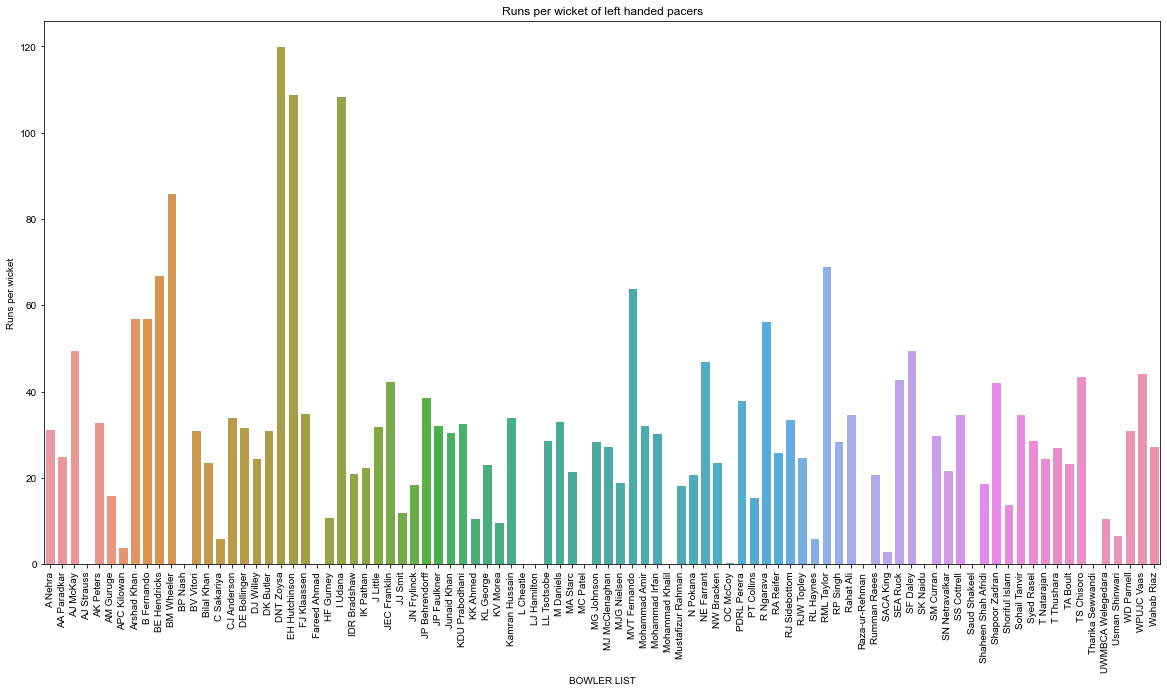

In [13]:
plt.figure(figsize=(20,10))
plt.title('Runs per wicket of left handed pacers')
tips={'BOWLER LIST': bowllp, 'Runs per wicket' : dellp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

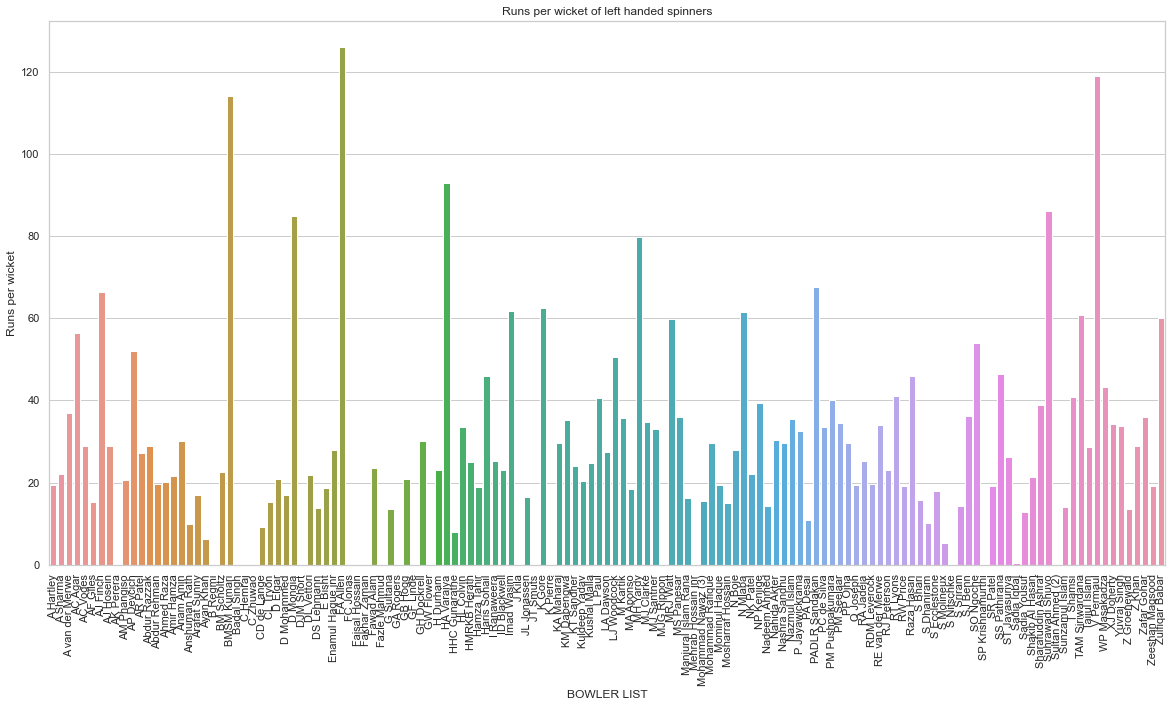

In [14]:
plt.figure(figsize=(20,10))
plt.title('Runs per wicket of left handed spinners')
tips={'BOWLER LIST': bowlls, 'Runs per wicket' : dells}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

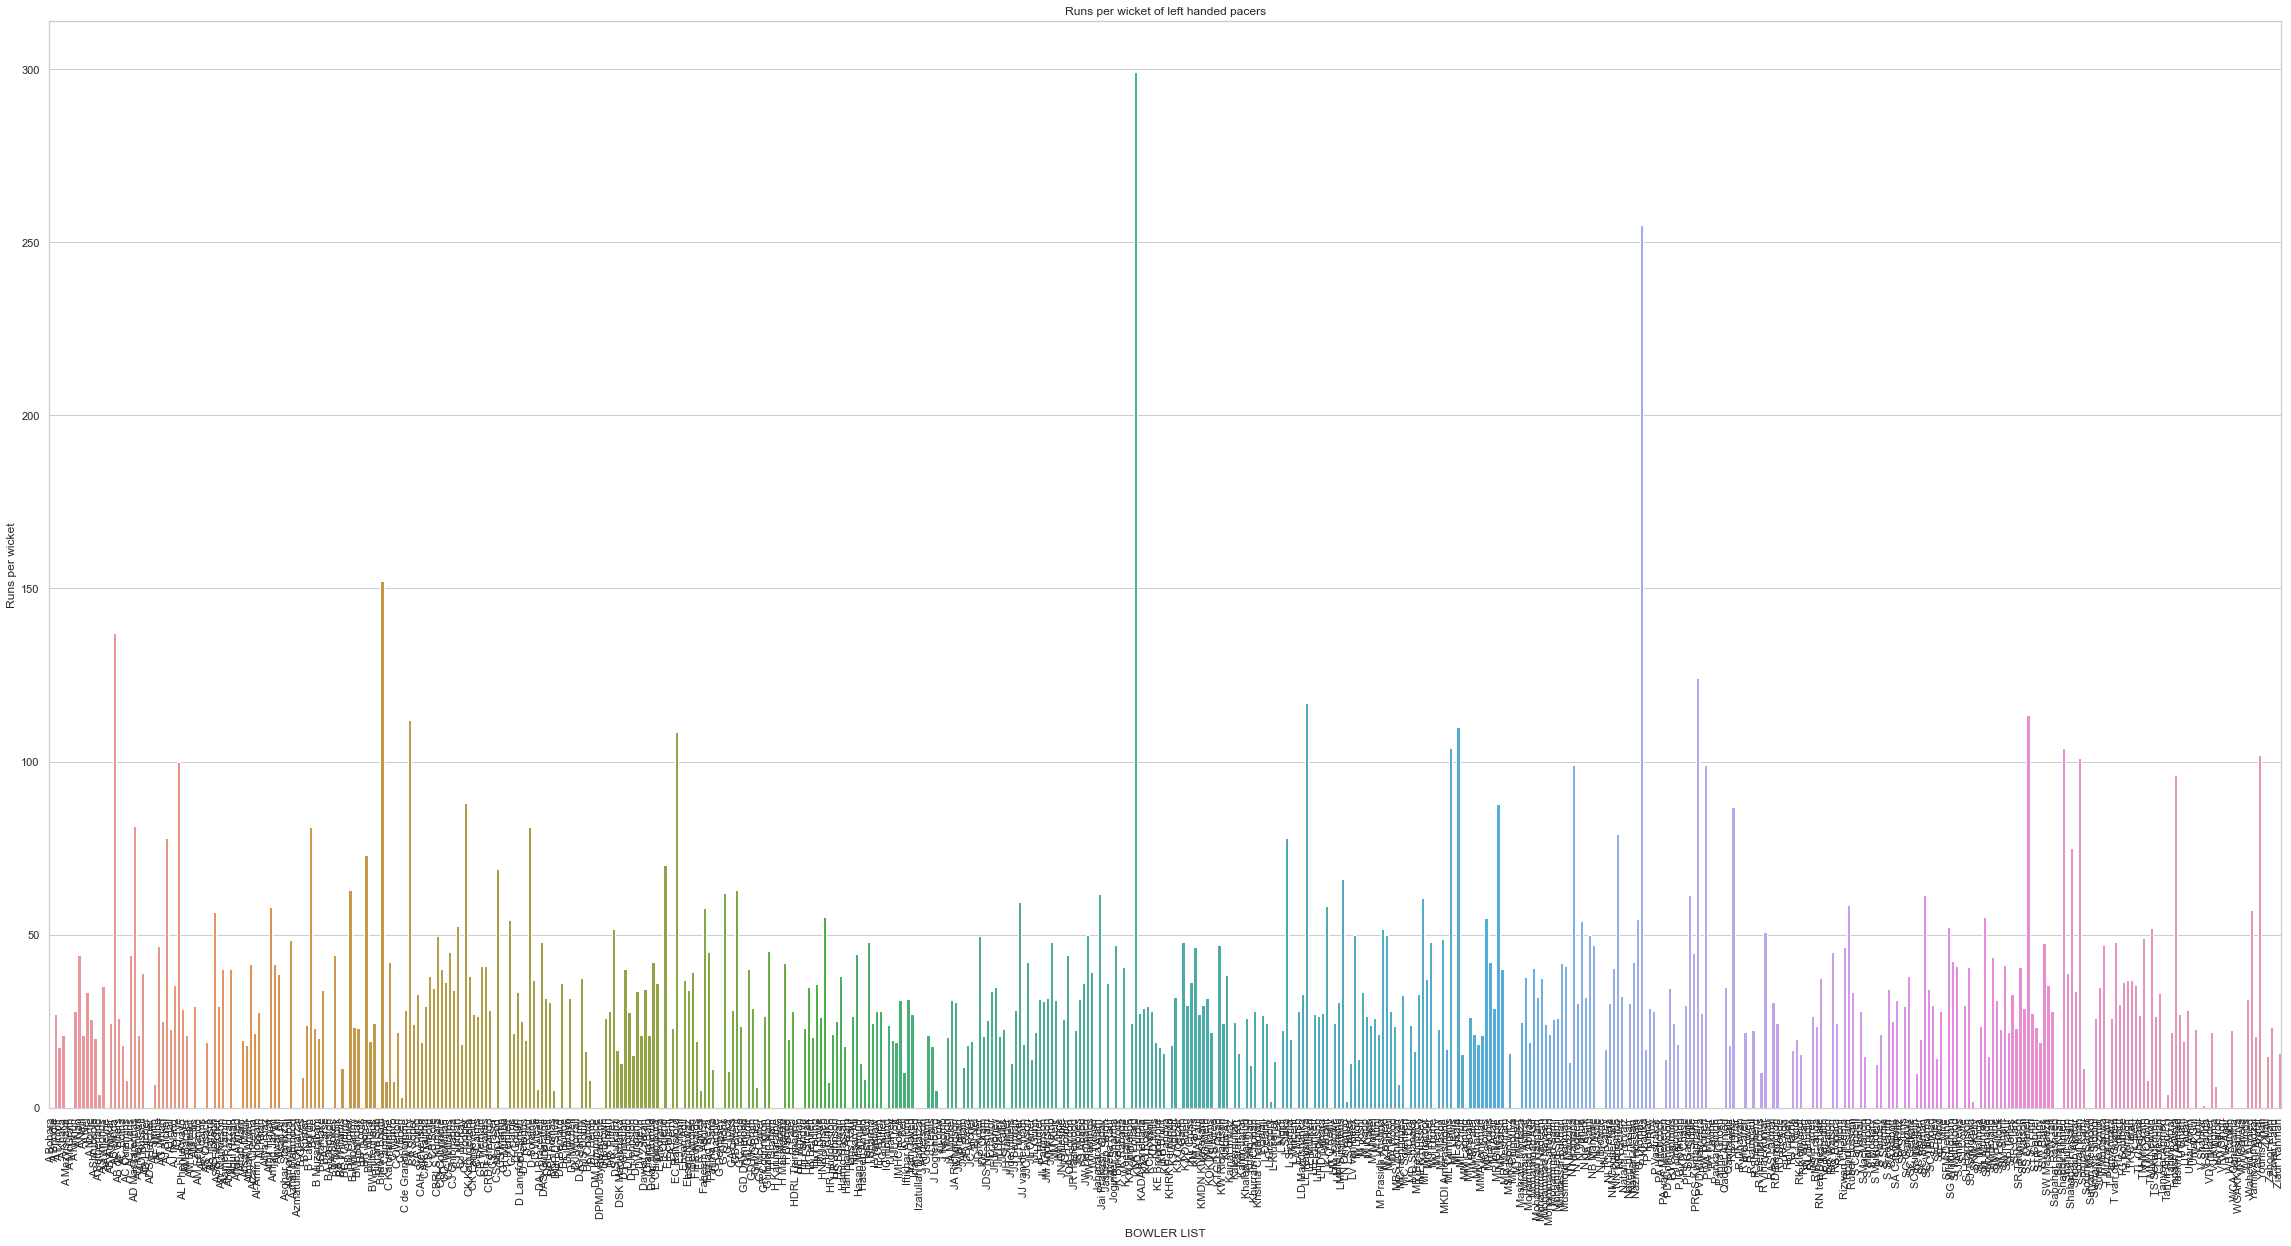

In [15]:
plt.figure(figsize=(40,20))
plt.title('Runs per wicket of left handed pacers')
tips={'BOWLER LIST': bowlrp, 'Runs per wicket' : delrp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

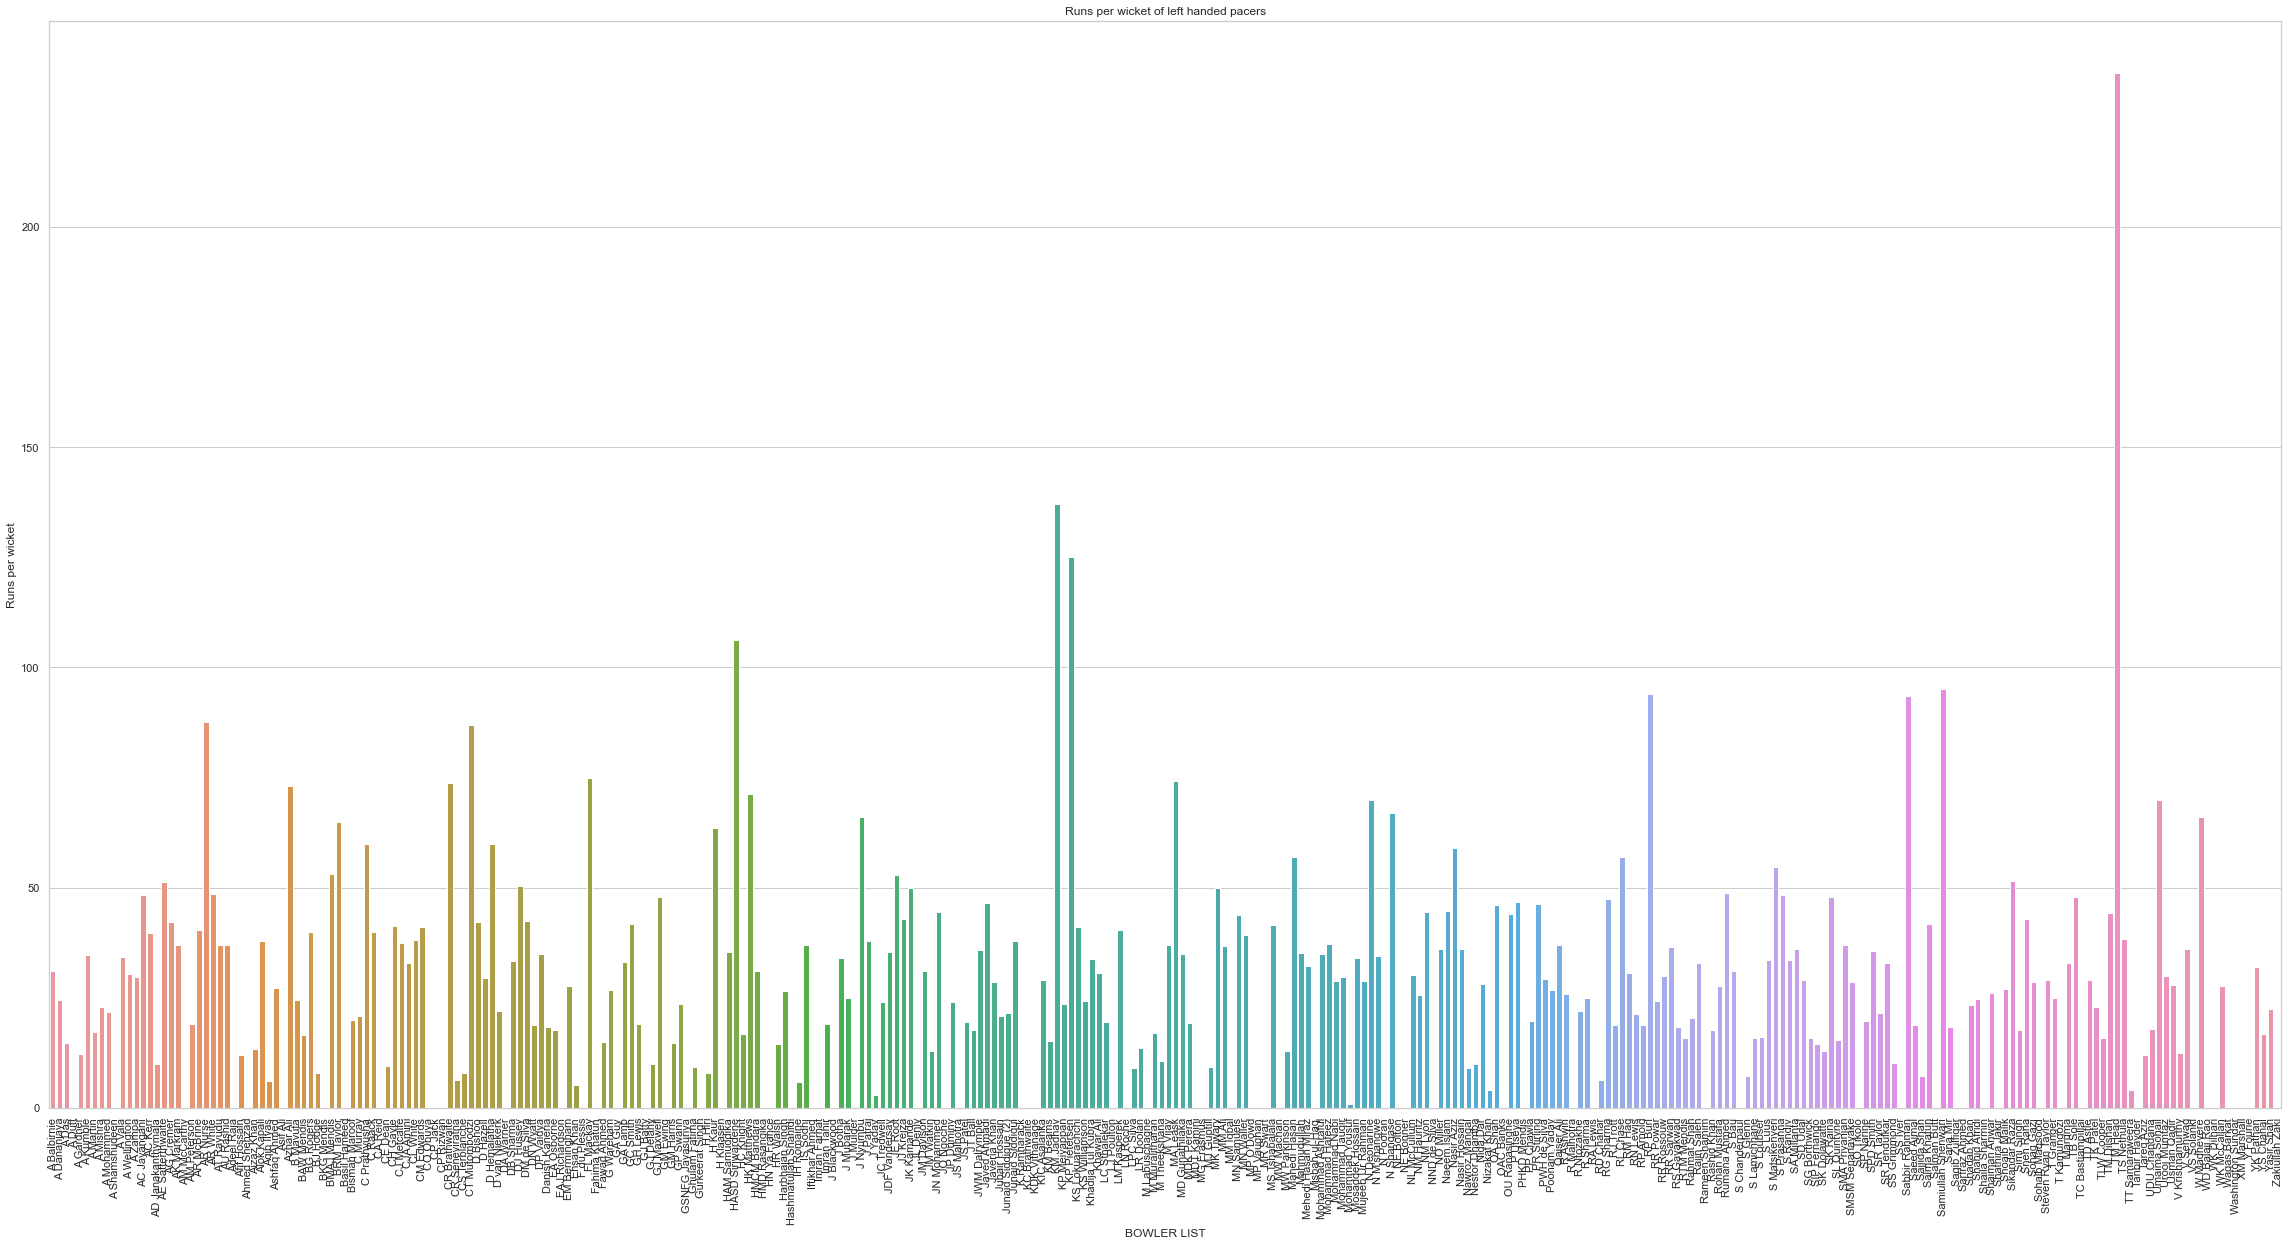

In [16]:
plt.figure(figsize=(40,20))
plt.title('Runs per wicket of left handed pacers')
tips={'BOWLER LIST': bowlrs, 'Runs per wicket' : delrs}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="Runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [17]:
def variance(data):
    n=len(data)
    mean=sum(data)/n;
    dev=[(x-mean)**2 for x in data]
    var=sum(dev)/n
    return var

def stddev(data):
    n=len(data)
    var=variance(data)
    return math.sqrt(var)

In [18]:
dellpup=[]
dellsup=[]
delrpup=[]
delrsup=[]

for i in dellp:
    if(i<1000):
        dellpup.append(i)
for i in dells:
    if(i<1000):
        dellsup.append(i)
for i in delrp:
    if(i<1000):
        delrpup.append(i)
for i in delrs:
    if(i<1000):
        delrsup.append(i)
        
dellp=dellpup
dells=dellsup
delrp=delrpup
delrs=delrsup

In [19]:
#variance and standard deviation for left pace
print("The mean Runs per wicket of the bowlers of left pace are:",np.mean(dellp))
print("The variance of Runs per wicket  of the bowlers of left pace are:",variance(dellp))
print("The standard deviation of Runs per wicket of the bowlers of left pace are:",stddev(dellp))

The mean Runs per wicket of the bowlers of left pace are: 32.8685065763237
The variance of Runs per wicket  of the bowlers of left pace are: 483.3651947905803
The standard deviation of Runs per wicket of the bowlers of left pace are: 21.98556787509889


In [20]:
#variance and standard deviation for left spin
print("The mean Runs per wicket of the bowlers of left spin are:",np.mean(dells))
print("The variance of Runs per wicket  of the bowlers of left spin are:",variance(dells))
print("The standard deviation of runs per wicket of the bowlers of left spin are:",stddev(dells))

The mean Runs per wicket of the bowlers of left spin are: 32.76351600175025
The variance of Runs per wicket  of the bowlers of left spin are: 499.4158148776793
The standard deviation of runs per wicket of the bowlers of left spin are: 22.347613180777927


In [21]:
#variance and standard deviation for right pace
print("The mean Runs per wicket of the bowlers of right pace are:",np.mean(delrp))
print("The variance of Runs per wicket  of the bowlers of right pace are:",variance(delrp))
print("The standard deviation of Runs per wicket of the bowlers of right pace are:",stddev(delrp))

The mean Runs per wicket of the bowlers of right pace are: 34.8728111787246
The variance of Runs per wicket  of the bowlers of right pace are: 746.7405117522983
The standard deviation of Runs per wicket of the bowlers of right pace are: 27.32655323586014


In [22]:
#variance and standard deviation for right spin
print("The mean Runs per wicket of the bowlers of right spin are:",np.mean(delrs))
print("The variance of Runs per wicket  of the bowlers of right spin are:",variance(delrs))
print("The standard deviation of Runs per wicket of the bowlers of right spin are:",stddev(delrs))

The mean Runs per wicket of the bowlers of right spin are: 33.73860329955442
The variance of Runs per wicket  of the bowlers of right spin are: 578.8128549311995
The standard deviation of Runs per wicket of the bowlers of right spin are: 24.058529774930125


In [23]:
print(len(dellp))
print(len(dells))
print(len(delrp))
print(len(delrs))

81
118
433
245


In [24]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=dellp, b=delrs, equal_var=False))
print(stats.ttest_ind(a=dellp, b=dells, equal_var=False))
print(stats.ttest_ind(a=dellp, b=delrp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-0.29995759250125686, pvalue=0.7646312811163456)
Ttest_indResult(statistic=0.032697070589966834, pvalue=0.9739537033903497)
Ttest_indResult(statistic=-0.7190110791092701, pvalue=0.4734211231320038)


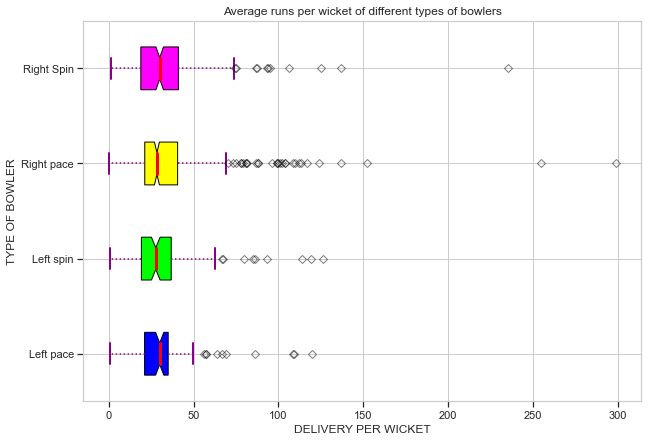

In [25]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot([dellp,dells,delrp,delrs], patch_artist = True,notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

#whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',linewidth = 1.5,linestyle =":")

#caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',color ='#e7298a',alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Left pace', 'Left spin','Right pace', 'Right Spin'])
 
# Adding title
plt.title("Average runs per wicket of different types of bowlers")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set(xlabel='DELIVERY PER WICKET', ylabel='TYPE OF BOWLER')
# show plot
plt.show()

# Some inferences drawn
> The left pace bowlers have the lowest avg. deliveries per wicket among all the four types of bowlers

> There is a very high standard deviation (~60% of the mean) in avg. deliveries per wicket for all the four types of bowlers

# Analysis on the deliveries per wicket of the bowlers against left handed batsman

In [26]:
dellp=[]
dells=[]
delrp=[]
delrs=[]
dellp=dflp['runs_left']/dflp['wickets_left']
dells=dfls['runs_left']/dfls['wickets_left']
delrp=dfrp['runs_left']/dfrp['wickets_left']
delrs=dfrs['runs_left']/dfrs['wickets_left']

In [27]:
dellp=dellp[h1:]
dells=dells[h2:]
delrp=delrp[h3:]
delrs=delrs[h4:]

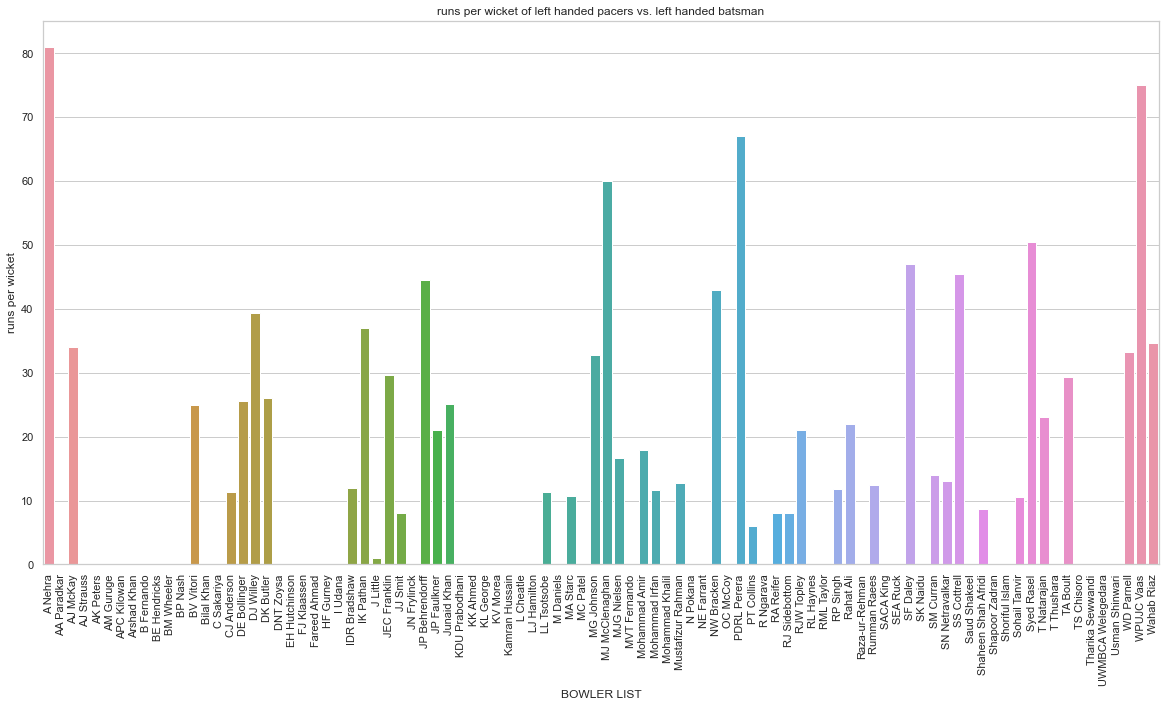

In [28]:
plt.figure(figsize=(20,10))
plt.title('runs per wicket of left handed pacers vs. left handed batsman')
tips={'BOWLER LIST': bowllp, 'runs per wicket' : dellp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

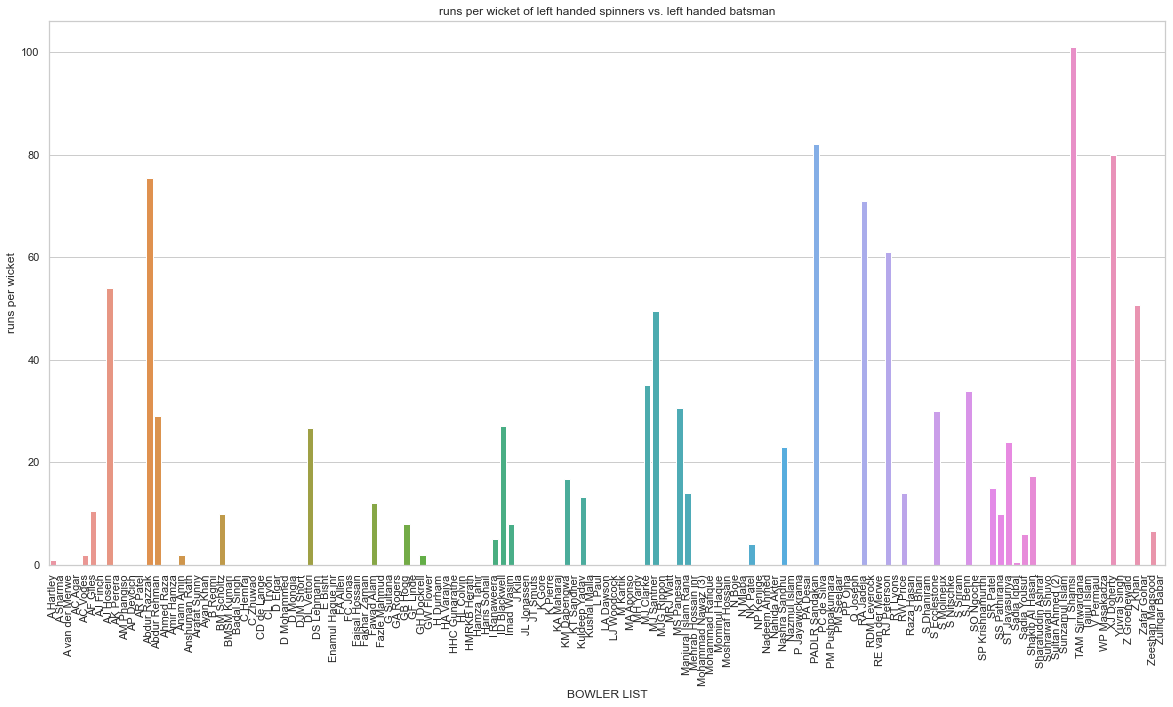

In [29]:
plt.figure(figsize=(20,10))
plt.title('runs per wicket of left handed spinners vs. left handed batsman')
tips={'BOWLER LIST': bowlls, 'runs per wicket' : dells}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

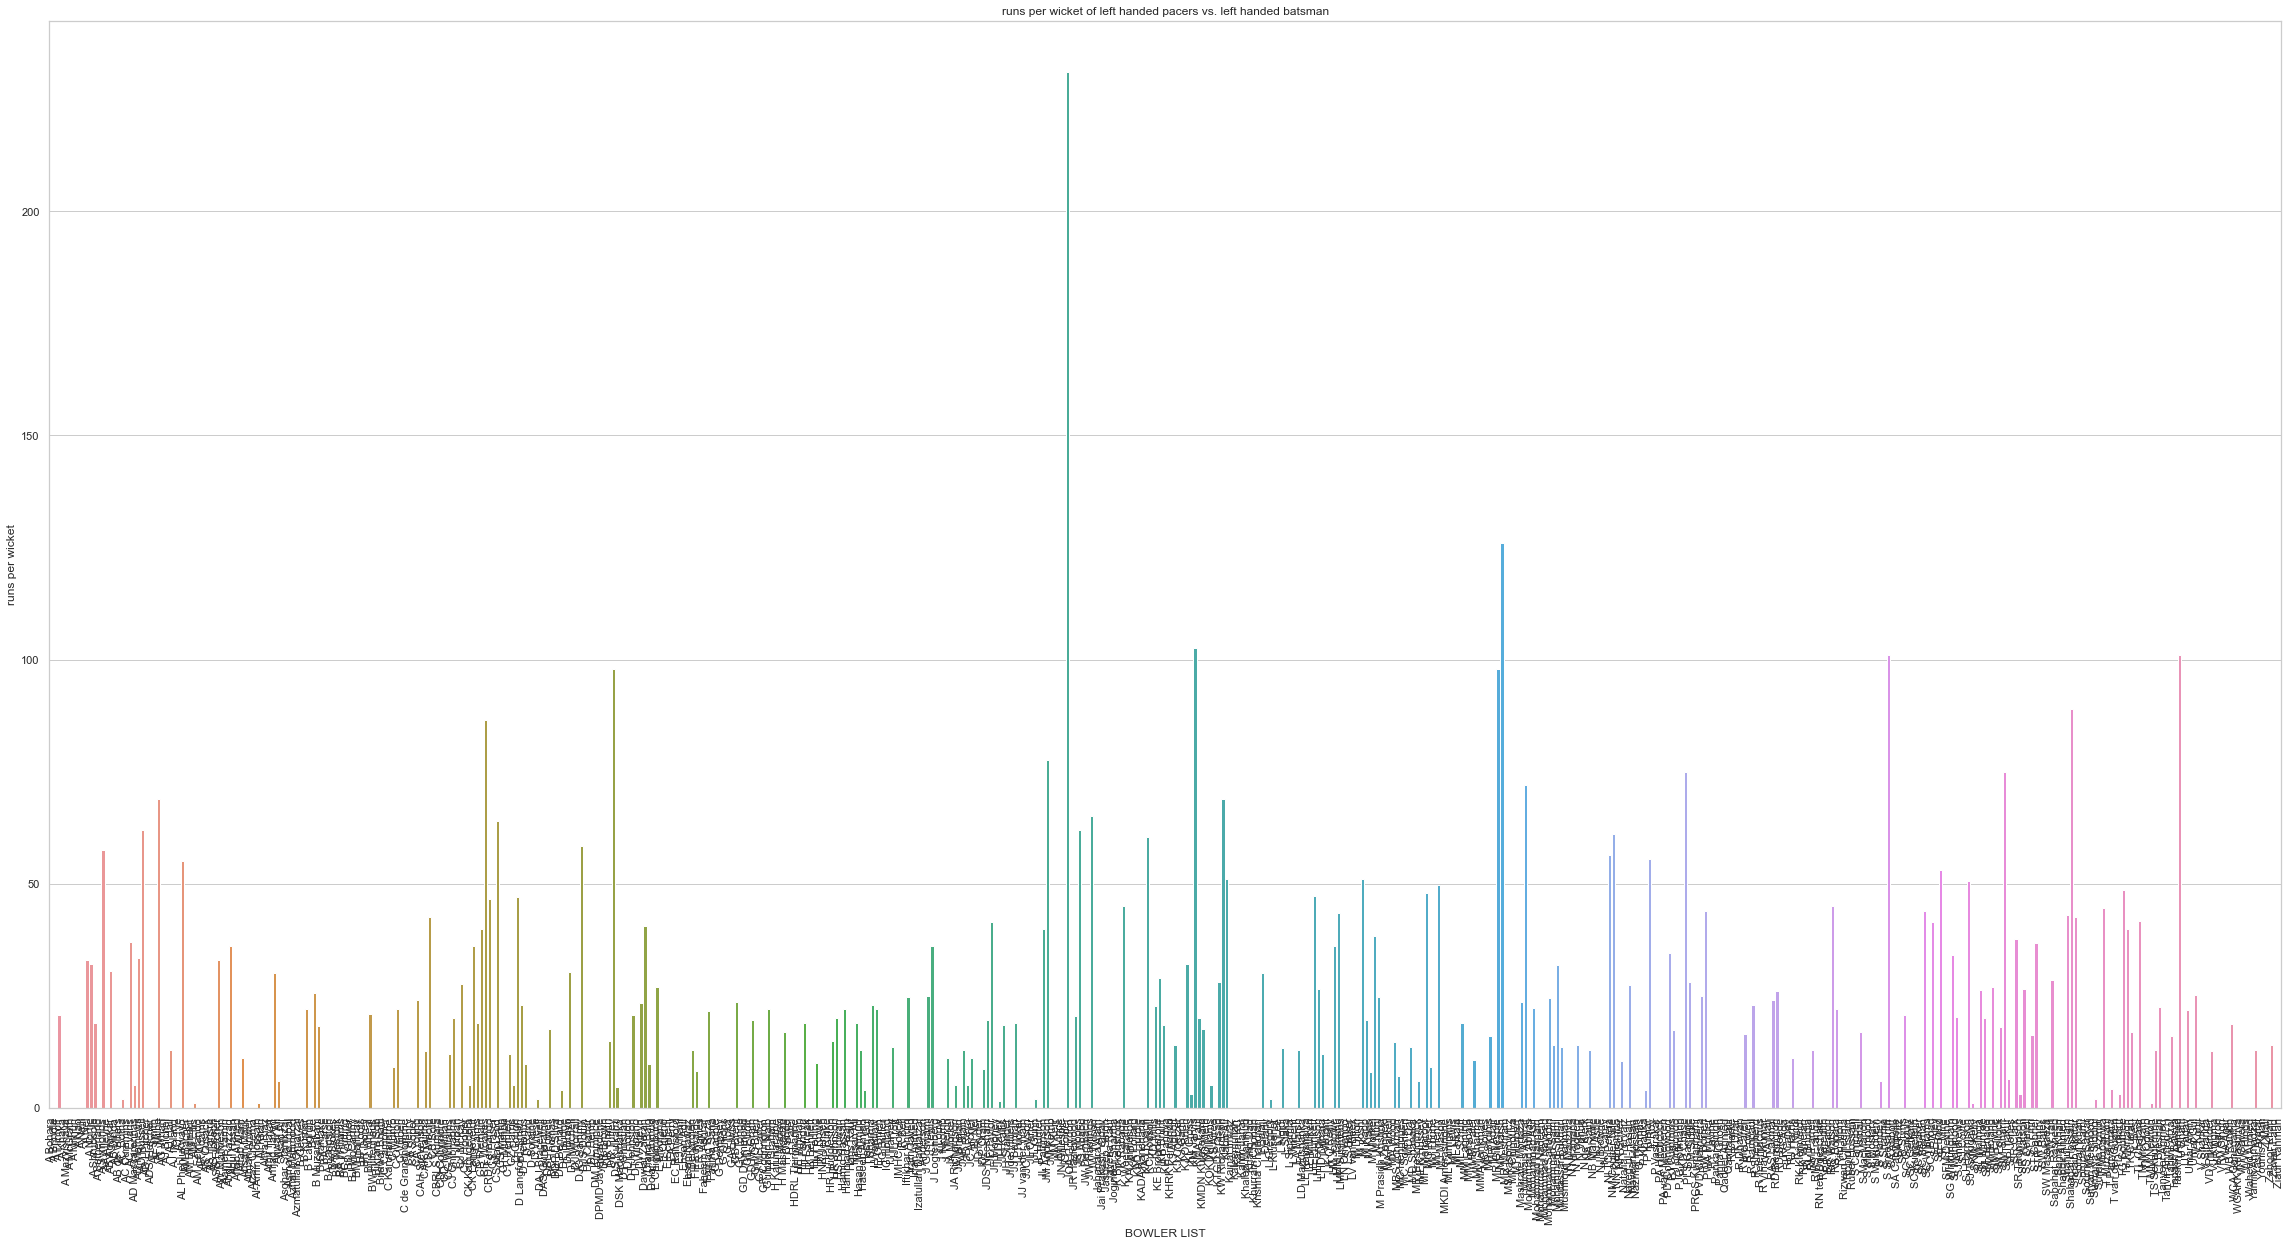

In [30]:
plt.figure(figsize=(40,20))
plt.title('runs per wicket of left handed pacers vs. left handed batsman')
tips={'BOWLER LIST': bowlrp, 'runs per wicket' : delrp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

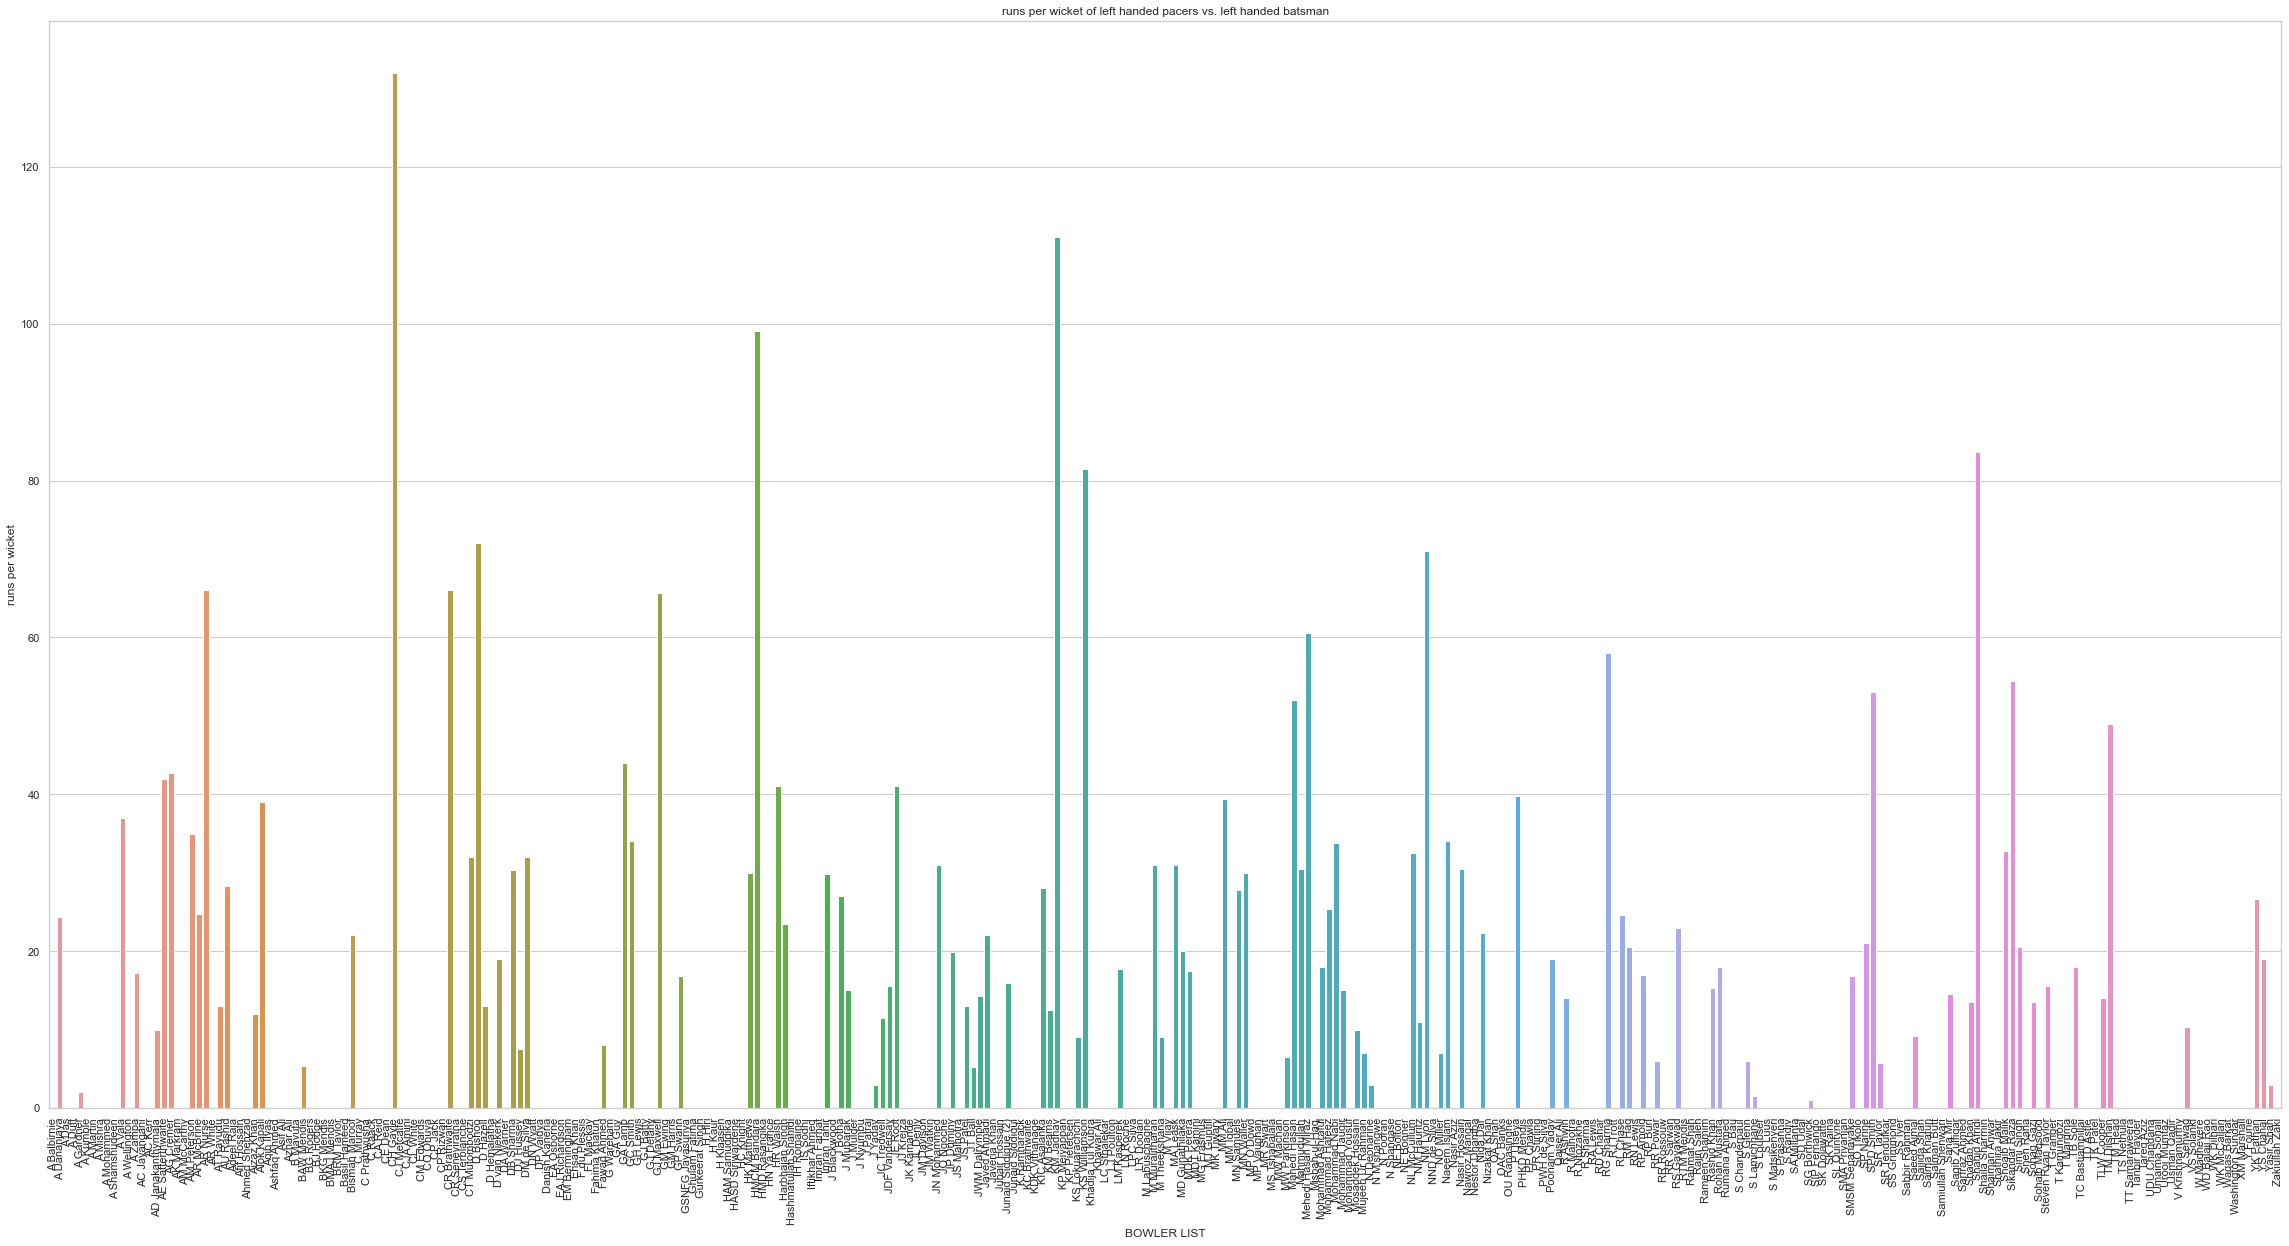

In [31]:
plt.figure(figsize=(40,20))
plt.title('runs per wicket of left handed pacers vs. left handed batsman')
tips={'BOWLER LIST': bowlrs, 'runs per wicket' : delrs}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [32]:
dellpup=[]
dellsup=[]
delrpup=[]
delrsup=[]

for i in dellp:
    if(i<1000):
        dellpup.append(i)
for i in dells:
    if(i<1000):
        dellsup.append(i)
for i in delrp:
    if(i<1000):
        delrpup.append(i)
for i in delrs:
    if(i<1000):
        delrsup.append(i)
        
dellp=dellpup
dells=dellsup
delrp=delrpup
delrs=delrsup

In [33]:
#variance and standard deviation for left pace
print("The mean runs per wicket of the bowlers of left pace vs. left handed batsman are:",np.mean(dellp))
print("The variance of runs per wicket  of the bowlers of left pace vs. left handed batsman are:",variance(dellp))
print("The standard deviation of runs per wicket of the bowlers of left pace vs. left handed batsman are:",stddev(dellp))

The mean runs per wicket of the bowlers of left pace vs. left handed batsman are: 26.768438852813855
The variance of runs per wicket  of the bowlers of left pace vs. left handed batsman are: 353.6473803321582
The standard deviation of runs per wicket of the bowlers of left pace vs. left handed batsman are: 18.80551462556019


In [34]:
#variance and standard deviation for left spin
print("The mean runs per wicket of the bowlers of left spin vs. left handed batsman are:",np.mean(dells))
print("The variance of runs per wicket  of the bowlers of left spin vs. left handed batsman are:",variance(dells))
print("The standard deviation of runs per wicket of the bowlers of left spin vs. left handed batsman are:",stddev(dells))

The mean runs per wicket of the bowlers of left spin vs. left handed batsman are: 27.218803418803418
The variance of runs per wicket  of the bowlers of left spin vs. left handed batsman are: 679.7458145226095
The standard deviation of runs per wicket of the bowlers of left spin vs. left handed batsman are: 26.071935381221884


In [35]:
#variance and standard deviation for right pace
print("The mean runs per wicket of the bowlers of right pace vs. left handed batsman are:",np.mean(delrp))
print("The variance of runs per wicket  of the bowlers of right pace vs. left handed batsman are:",variance(delrp))
print("The standard deviation of runs per wicket of the bowlers of right pace vs. left handed batsman are:",stddev(delrp))

The mean runs per wicket of the bowlers of right pace vs. left handed batsman are: 27.83988275613276
The variance of runs per wicket  of the bowlers of right pace vs. left handed batsman are: 696.8982175245903
The standard deviation of runs per wicket of the bowlers of right pace vs. left handed batsman are: 26.398829851426946


In [36]:
#variance and standard deviation for right spin
print("The mean runs per wicket of the bowlers of right spin vs. left handed batsman are:",np.mean(delrs))
print("The variance of runs per wicket  of the bowlers of right spin vs. left handed batsman are:",variance(delrs))
print("The standard deviation of runs per wicket of the bowlers of right spin vs. left handed batsman are:",stddev(delrs))

The mean runs per wicket of the bowlers of right spin vs. left handed batsman are: 25.98541048024519
The variance of runs per wicket  of the bowlers of right spin vs. left handed batsman are: 530.0272666286747
The standard deviation of runs per wicket of the bowlers of right spin vs. left handed batsman are: 23.02232105215881


In [37]:
print(len(dellp))
print(len(dells))
print(len(delrp))
print(len(delrs))

44
39
220
121


In [38]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=delrs, b=delrp, equal_var=False))
print(stats.ttest_ind(a=delrs, b=dells, equal_var=False))
print(stats.ttest_ind(a=delrs, b=dellp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-0.6727286246539802, pvalue=0.5016816850822778)
Ttest_indResult(statistic=-0.26115654356918433, pvalue=0.794897474906765)
Ttest_indResult(statistic=-0.22023303391371116, pvalue=0.826177255645703)


# Some inferences drawn
> The left pace bowlers have the lowest avg. deliveries per wicket vs. left handed batsman among all the four types of bowlers

> There is a very high standard deviation (~65% of the mean) in avg. deliveries per wicket for all the four types of bowlers

In [39]:
dellp=[]
dells=[]
delrp=[]
delrs=[]
dellp=dflp['delivery_right']/dflp['wickets_right']
dells=dfls['delivery_right']/dfls['wickets_right']
delrp=dfrp['delivery_right']/dfrp['wickets_right']
delrs=dfrs['delivery_right']/dfrs['wickets_right']

In [40]:
dellp=dellp[h1:]
dells=dells[h2:]
delrp=delrp[h3:]
delrs=delrs[h4:]

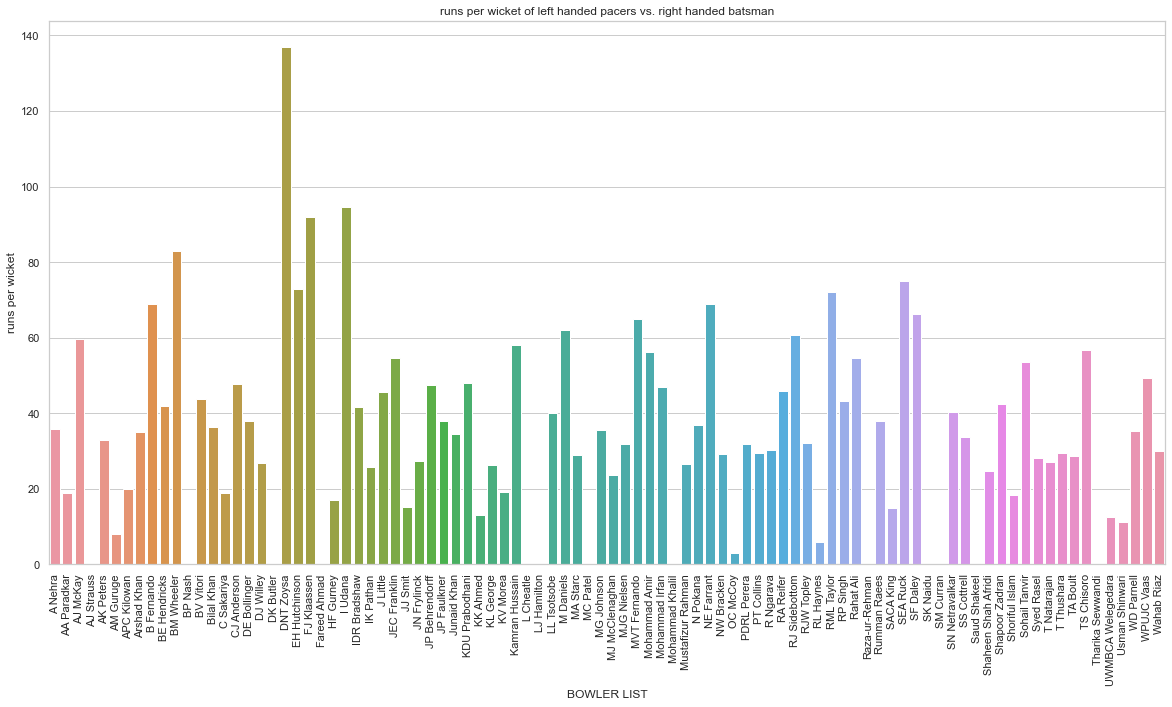

In [41]:
plt.figure(figsize=(20,10))
plt.title('runs per wicket of left handed pacers vs. right handed batsman')
tips={'BOWLER LIST': bowllp, 'runs per wicket' : dellp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowllp, rotation=90)

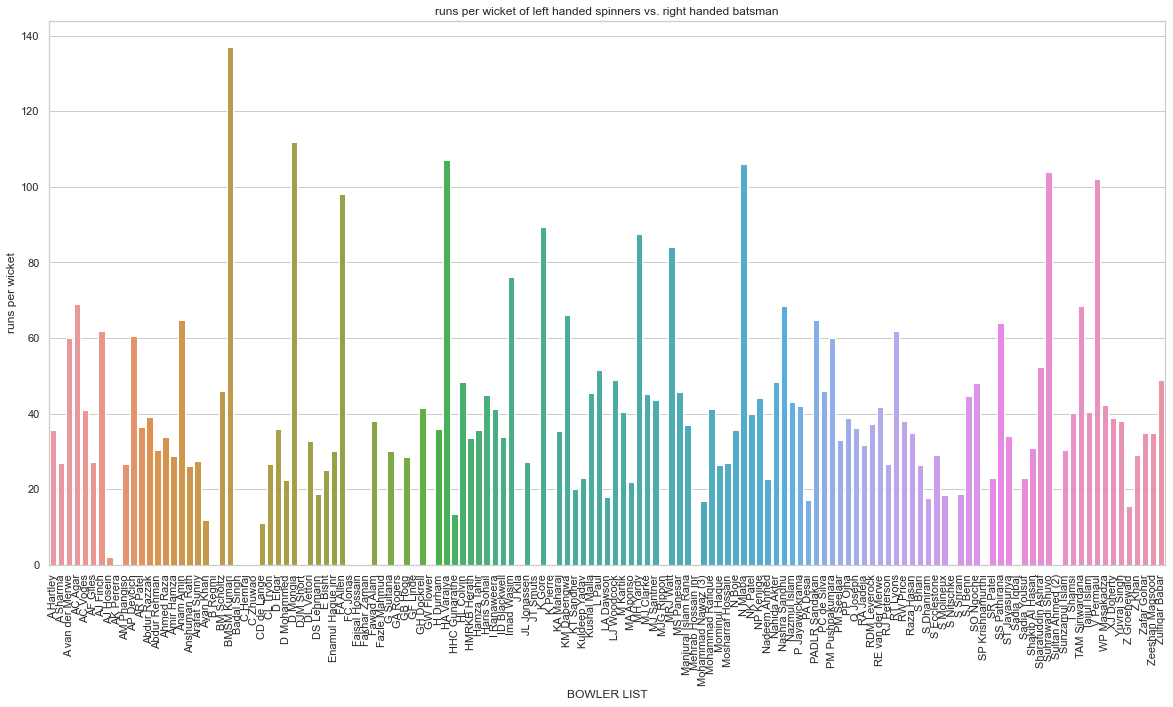

In [42]:
plt.figure(figsize=(20,10))
plt.title('runs per wicket of left handed spinners vs. right handed batsman')
tips={'BOWLER LIST': bowlls, 'runs per wicket' : dells}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlls, rotation=90)

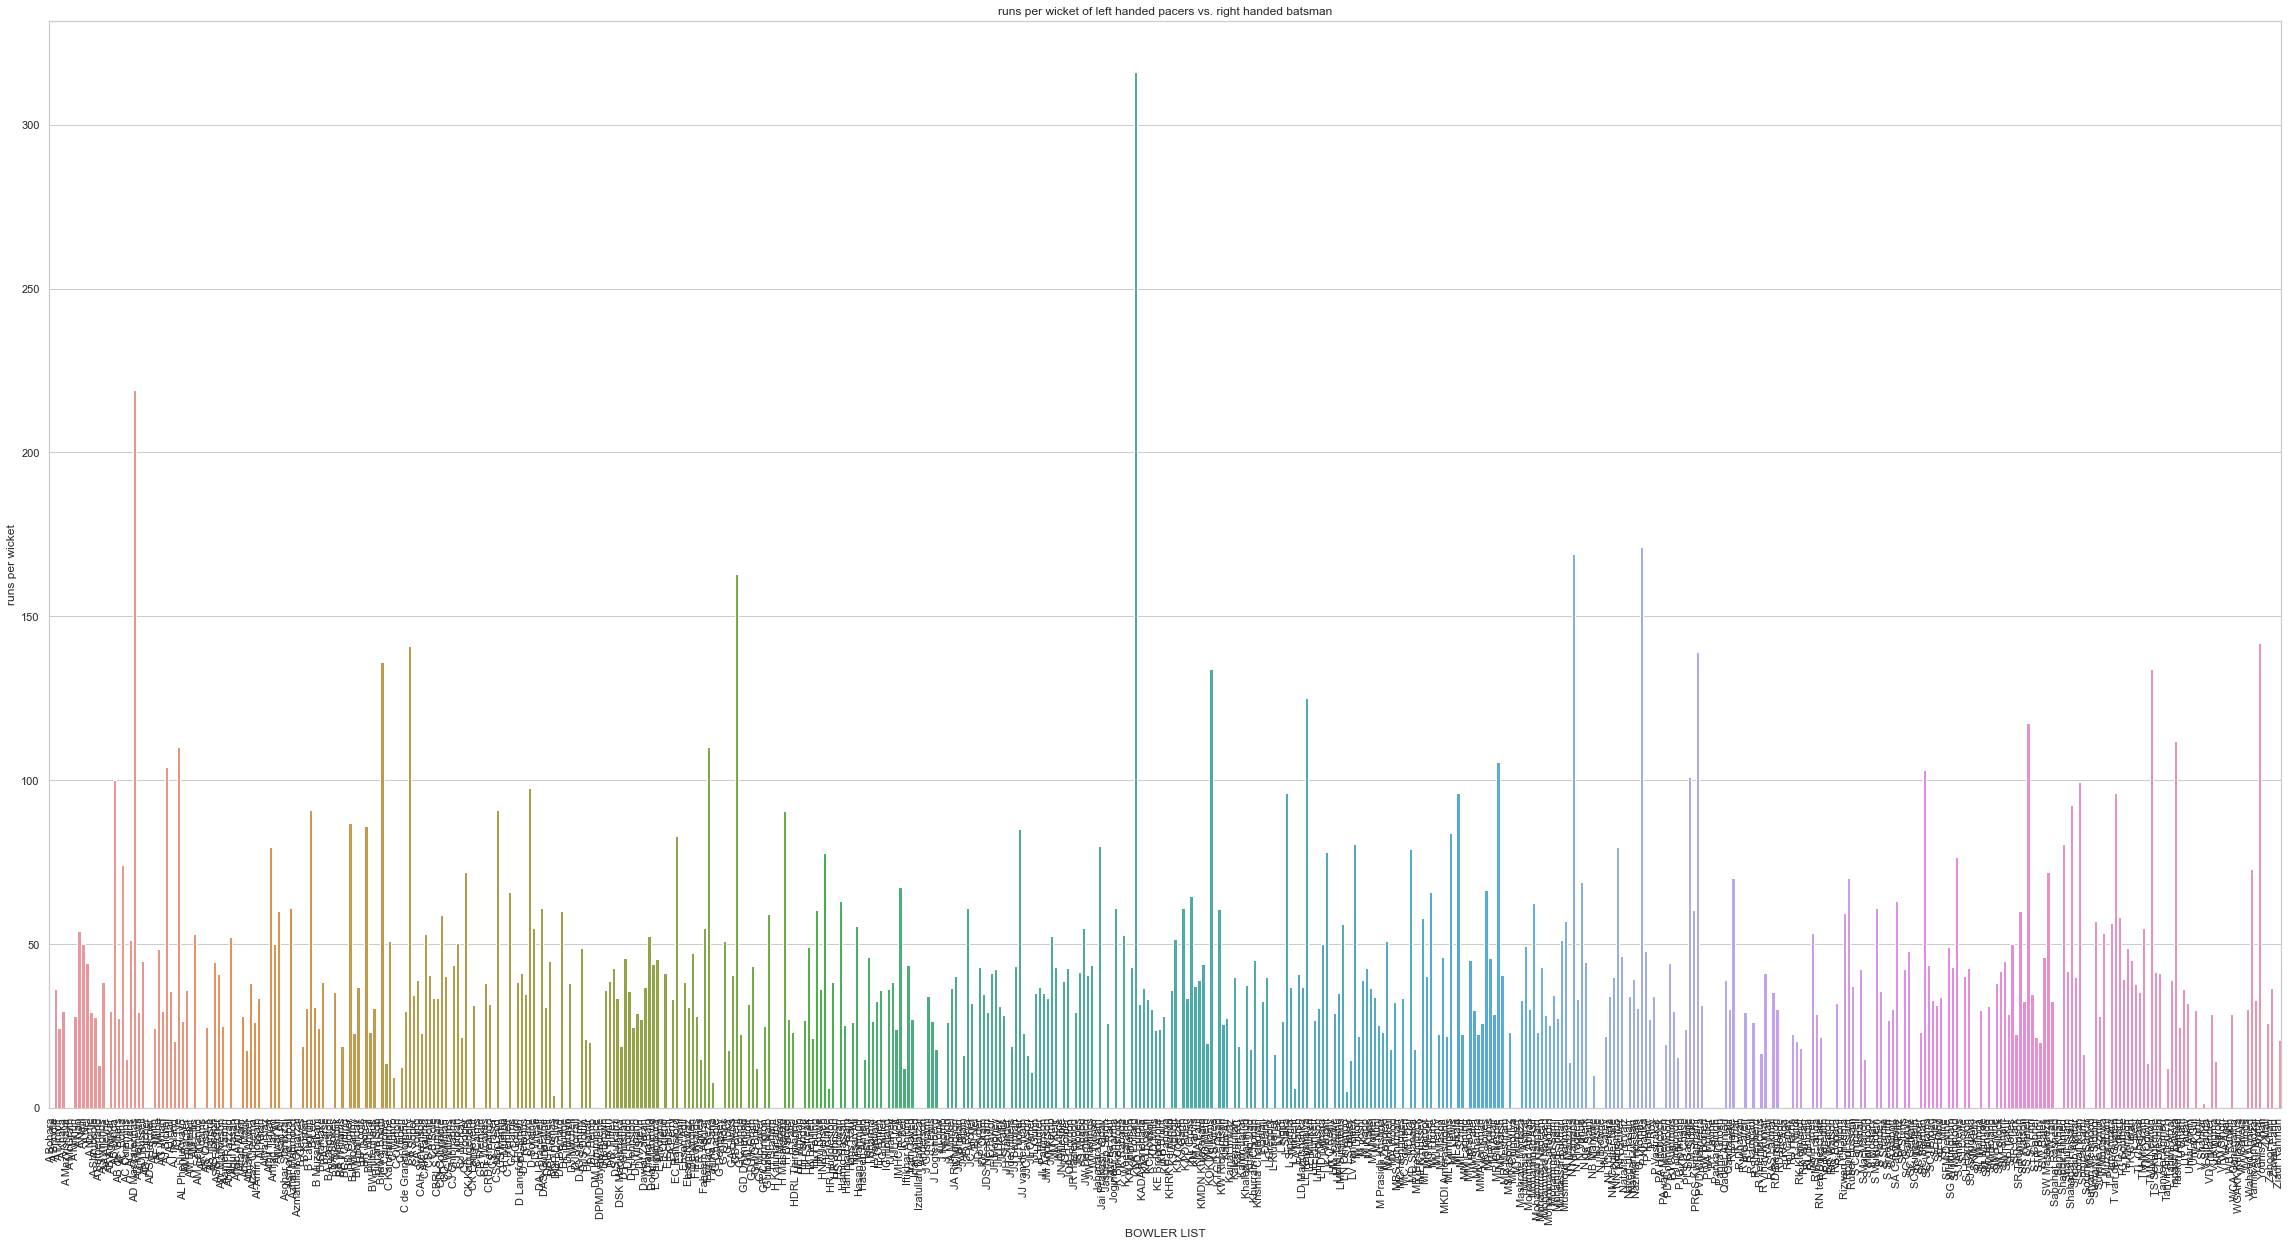

In [43]:
plt.figure(figsize=(40,20))
plt.title('runs per wicket of left handed pacers vs. right handed batsman')
tips={'BOWLER LIST': bowlrp, 'runs per wicket' : delrp}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrp, rotation=90)

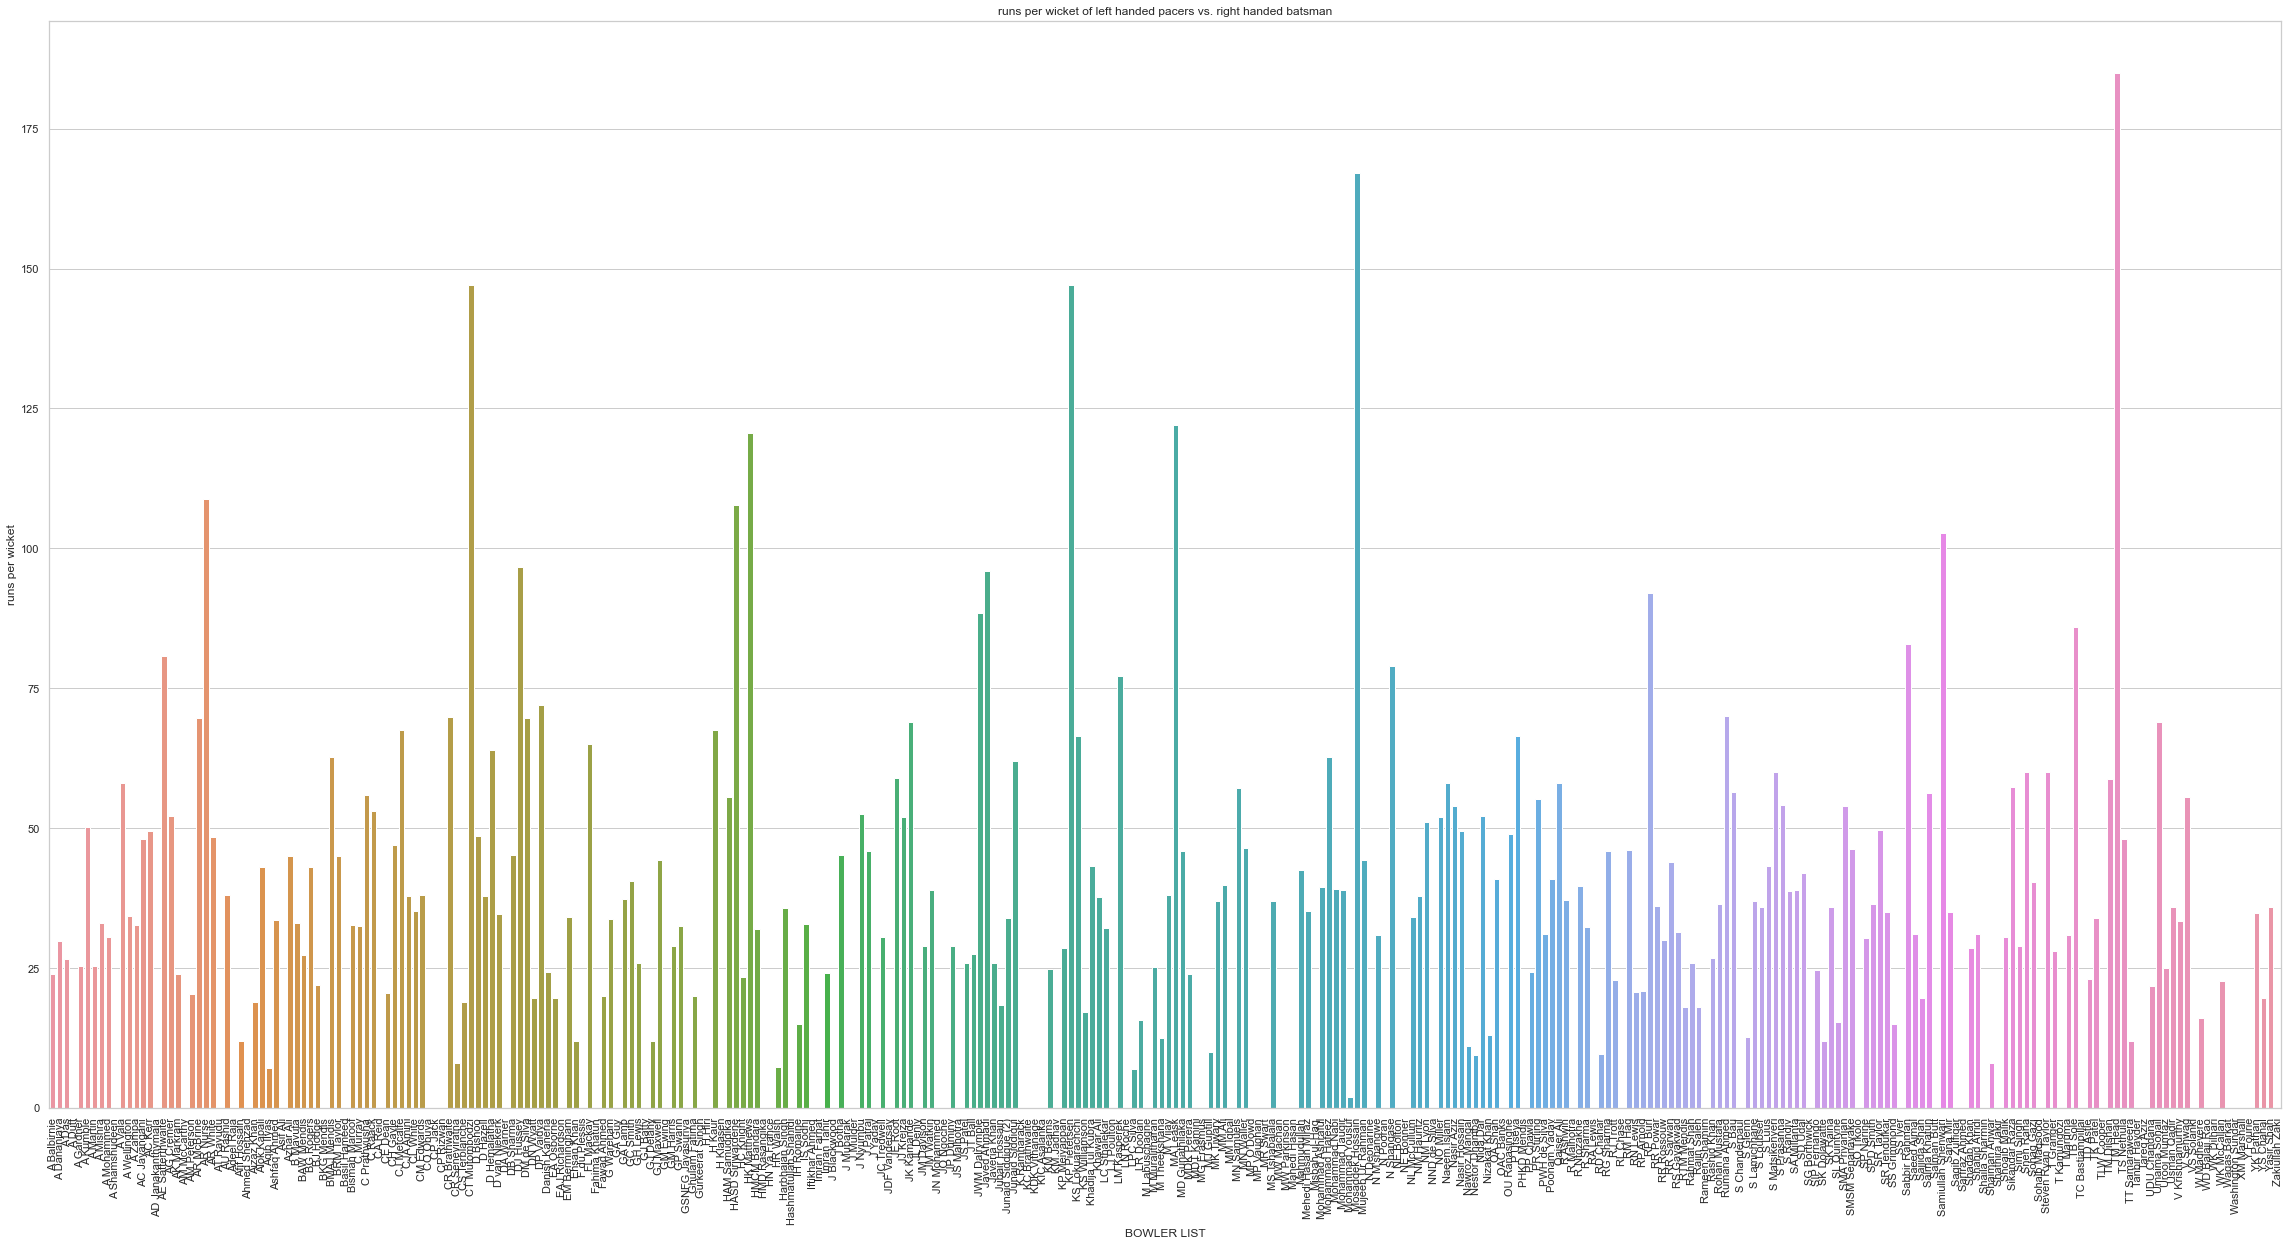

In [44]:
plt.figure(figsize=(40,20))
plt.title('runs per wicket of left handed pacers vs. right handed batsman')
tips={'BOWLER LIST': bowlrs, 'runs per wicket' : delrs}
tips=pd.DataFrame(tips)
sns.set_theme(style="whitegrid")
ax=sns.barplot(x='BOWLER LIST', y="runs per wicket", data=tips)
cv=ax.set_xticklabels(labels=bowlrs, rotation=90)

In [45]:
dellpup=[]
dellsup=[]
delrpup=[]
delrsup=[]

for i in dellp:
    if(i<1000):
        dellpup.append(i)
for i in dells:
    if(i<1000):
        dellsup.append(i)
for i in delrp:
    if(i<1000):
        delrpup.append(i)
for i in delrs:
    if(i<1000):
        delrsup.append(i)
        
dellp=dellpup
dells=dellsup
delrp=delrpup
delrs=delrsup

In [46]:
#variance and standard deviation for left pace
print("The mean runs per wicket of the bowlers of left pace vs. right handed batsman are:",np.mean(dellp))
print("The variance of runs per wicket  of the bowlers of left pace vs. right handed batsman are:",variance(dellp))
print("The standard deviation of runs per wicket of the bowlers of left pace vs. right handed batsman are:",stddev(dellp))

The mean runs per wicket of the bowlers of left pace vs. right handed batsman are: 40.536841308399715
The variance of runs per wicket  of the bowlers of left pace vs. right handed batsman are: 495.7184403758745
The standard deviation of runs per wicket of the bowlers of left pace vs. right handed batsman are: 22.264735353825216


In [47]:
#variance and standard deviation for left spin
print("The mean runs per wicket of the bowlers of left spin vs. right handed batsman are:",np.mean(dells))
print("The variance of deliveries per wicket  of the bowlers of left spin vs. right handed batsman are:",variance(dells))
print("The standard deviation of runs per wicket of the bowlers of left spin vs. right handed batsman are:",stddev(dells))

The mean runs per wicket of the bowlers of left spin vs. right handed batsman are: 42.51159946209353
The variance of deliveries per wicket  of the bowlers of left spin vs. right handed batsman are: 544.2175520177473
The standard deviation of runs per wicket of the bowlers of left spin vs. right handed batsman are: 23.32847084610878


In [48]:
#variance and standard deviation for right pace
print("The mean runs per wicket of the bowlers of right pace vs. right handed batsman are:",np.mean(delrp))
print("The variance of runs per wicket  of the bowlers of right pace vs. right handed batsman are:",variance(delrp))
print("The standard deviation of runs per wicket of the bowlers of right pace vs. right handed batsman are:",stddev(delrp))

The mean runs per wicket of the bowlers of right pace vs. right handed batsman are: 43.78864490064356
The variance of runs per wicket  of the bowlers of right pace vs. right handed batsman are: 935.7206652721553
The standard deviation of runs per wicket of the bowlers of right pace vs. right handed batsman are: 30.589551570301833


In [49]:
#variance and standard deviation for right spin
print("The mean runs per wicket of the bowlers of right spin vs. right handed batsman are:",np.mean(delrs))
print("The variance of runs per wicket  of the bowlers of right spin vs. right handed batsman are:",variance(delrs))
print("The standard deviation of runs per wicket of the bowlers of right spin vs. right handed batsman are:",stddev(delrs))

The mean runs per wicket of the bowlers of right spin vs. right handed batsman are: 42.125888349105296
The variance of runs per wicket  of the bowlers of right spin vs. right handed batsman are: 701.5916339499904
The standard deviation of runs per wicket of the bowlers of right spin vs. right handed batsman are: 26.487575086254882


In [50]:
print(len(dellp))
print(len(dells))
print(len(delrp))
print(len(delrs))

79
117
412
229


In [51]:
################ double tailed t-test #####################
print(stats.ttest_ind(a=dellp, b=delrs, equal_var=False))
print(stats.ttest_ind(a=dellp, b=dells, equal_var=False))
print(stats.ttest_ind(a=dellp, b=delrp, equal_var=False))
################         end          #####################

Ttest_indResult(statistic=-0.517395760190764, pvalue=0.6055986931422201)
Ttest_indResult(statistic=-0.5941468485559795, pvalue=0.5531924418812744)
Ttest_indResult(statistic=-1.1067949038745406, pvalue=0.27027435204593875)


# Some inferences drawn
> The left pace bowlers have the lowest avg. deliveries per wicket vs. right handed batsman among all the four types of bowlers

> There is a very high standard deviation (~70% of the mean) in avg. deliveries per wicket for all the four types of bowlers